In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Veri setini okuduk.
raw_data = pd.read_csv("creditcard.csv")
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Elimizdeki veri ile ilgili detaylara baktık.
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Veri Analizi

In [4]:
raw_data.isna().sum().max() # Veri seti içerisinde boş veri var mı diye kontrol ediyoruz.

0

In [5]:
dups = raw_data.duplicated()  # Tekrarlanan veri sayısını gösterir.
print(dups.sum())

1081


In [6]:
raw_data = raw_data.drop_duplicates() # Tekrarlanan satırları sildik.

In [7]:
raw_data["Class"].value_counts()*100/len(raw_data) # Class sütunu eğer 1 ise bu bize kredi kartının fraud (sahte), 0 ise normal kredi kartı olduğunu gösterir.

0    99.83329
1     0.16671
Name: Class, dtype: float64

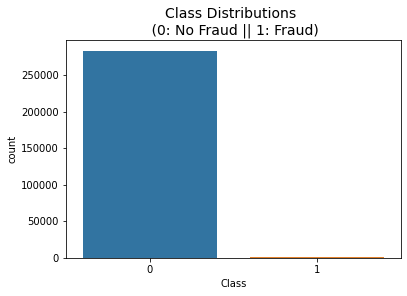

In [8]:
# Class sütunun grafik üzerinden gösterilmesi
sns.countplot(x='Class', data=raw_data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14);

In [9]:
# Scale edilmemiş Time ve amount sütunlarını scale ettik.
from sklearn.preprocessing import StandardScaler,RobustScaler

scaler = RobustScaler()
raw_data["Scaled_amount"] = scaler.fit_transform(raw_data["Amount"].values.reshape(-1,1))
raw_data["Scaled_time"] = scaler.fit_transform(raw_data["Time"].values.reshape(-1,1))
raw_data.drop(["Amount","Time"],axis=1,inplace=True)

raw_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_amount,Scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


In [10]:
fraud = raw_data[raw_data['Class']==1] # Class sütunu eğer 1 ise bu bize kredi kartının fraud (sahte) olduğunu gösterir.

normal = raw_data[raw_data['Class']==0] # Class sütunu eğer 0 ise bu bize kredi kartının normal olduğunu gösterir.

In [11]:
print("Sahte Kredi Kartı verileri: ", fraud.shape) # Sahte kart verileri
print("Normal Kredi Kartı verileri: ", normal.shape) # Normal kart verileri

Sahte Kredi Kartı verileri:  (473, 31)
Normal Kredi Kartı verileri:  (283253, 31)


In [12]:
normal_data = normal.sample(frac = 0.1,random_state=1) # Çok fazla datamız vardı. Belirli sayıda örnek alarak veri setimizi biraz küçülttük.
normal_data.shape

(28325, 31)

In [13]:
frames = [normal_data, fraud] # Yeni data seti oluşturmak için normal ve hileli kredi kartı verilerini birleştirdik.
result = pd.concat(frames)

In [14]:
data = result.sample(frac=1).reset_index(drop=True)  # Elimizdeki veri setini azaltarak 1 olan değerleri karıştırdık.
data.shape
raw_data = data

In [15]:
fraud = data[data['Class']==1] # Class sütunu eğer 1 ise bu bize kredi kartının fraud (sahte) olduğunu gösterir.

normal = data[data['Class']==0] # Class sütunu eğer 0 ise bu bize kredi kartının normal olduğunu gösterir.

outlier_fraction = len(fraud)/float(len(normal))

In [16]:
# Over sampling
raw_data_0 = raw_data[raw_data["Class"]==0] # Sadece 0 etiketli veri
raw_data_1 = raw_data[raw_data["Class"]==1] # Sadece 1 etiketli veri
data_0_count = len(raw_data_0) # 0 değerli datanın sayısı
data_1_count = len(raw_data_1) # 1 değerli datanın sayısı
data_1 = raw_data_1.sample(data_0_count,replace=True) # Over sampling işlemi
data = pd.concat([raw_data_0, data_1], axis=0,ignore_index=True) # Over samplingten sonra datanın birleştirilmesi
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_amount,Scaled_time
0,1.741278,-0.308390,-2.691962,0.501510,0.726771,-0.930688,0.787999,-0.309686,-0.084587,-0.218226,...,0.267041,-0.156838,0.677821,0.265540,0.647837,-0.140155,-0.034410,0,2.059936,0.951856
1,-0.471176,-0.247107,1.429078,-1.787527,-1.622593,-0.133360,0.036839,-1.253894,-1.669711,1.305355,...,-0.668985,0.077289,0.353865,-0.036081,-0.346002,-0.221003,-0.255757,0,1.312613,-0.530283
2,-3.719429,-0.887125,-0.744912,1.673271,0.890147,0.037773,0.199178,1.015678,-0.981459,-1.512470,...,-0.103765,0.562128,0.057558,0.965982,-0.355124,0.442298,-0.822455,0,1.307190,0.558617
3,2.084090,0.229376,-2.168343,0.248368,0.892264,-0.634969,0.324995,-0.339423,0.408198,-0.529781,...,0.654897,-0.111635,0.007593,0.414047,-0.098110,-0.002505,-0.025191,0,0.010986,0.880840
4,2.086153,0.027435,-2.040990,0.206645,0.648332,-0.881837,0.536175,-0.305034,-0.070816,0.341592,...,0.539623,0.001342,0.840129,0.353034,0.658463,-0.123258,-0.088559,0,-0.295369,0.515417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56645,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,-15.239962,...,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,1,0.778751,0.107735
56646,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,-13.202577,...,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,1,0.115561,0.107958
56647,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,-1.611155,-1.250286,...,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843,1,0.040328,-0.484157
56648,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,-6.564659,...,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,1,9.816576,0.637530


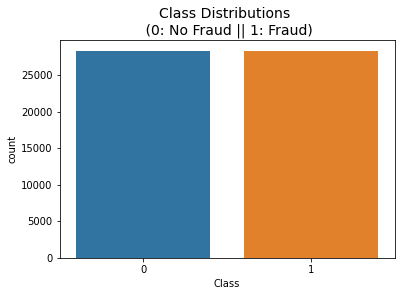

In [17]:
# Veri seti dengelendikten sonraki grafiksel gösterimi
sns.countplot(x='Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14);

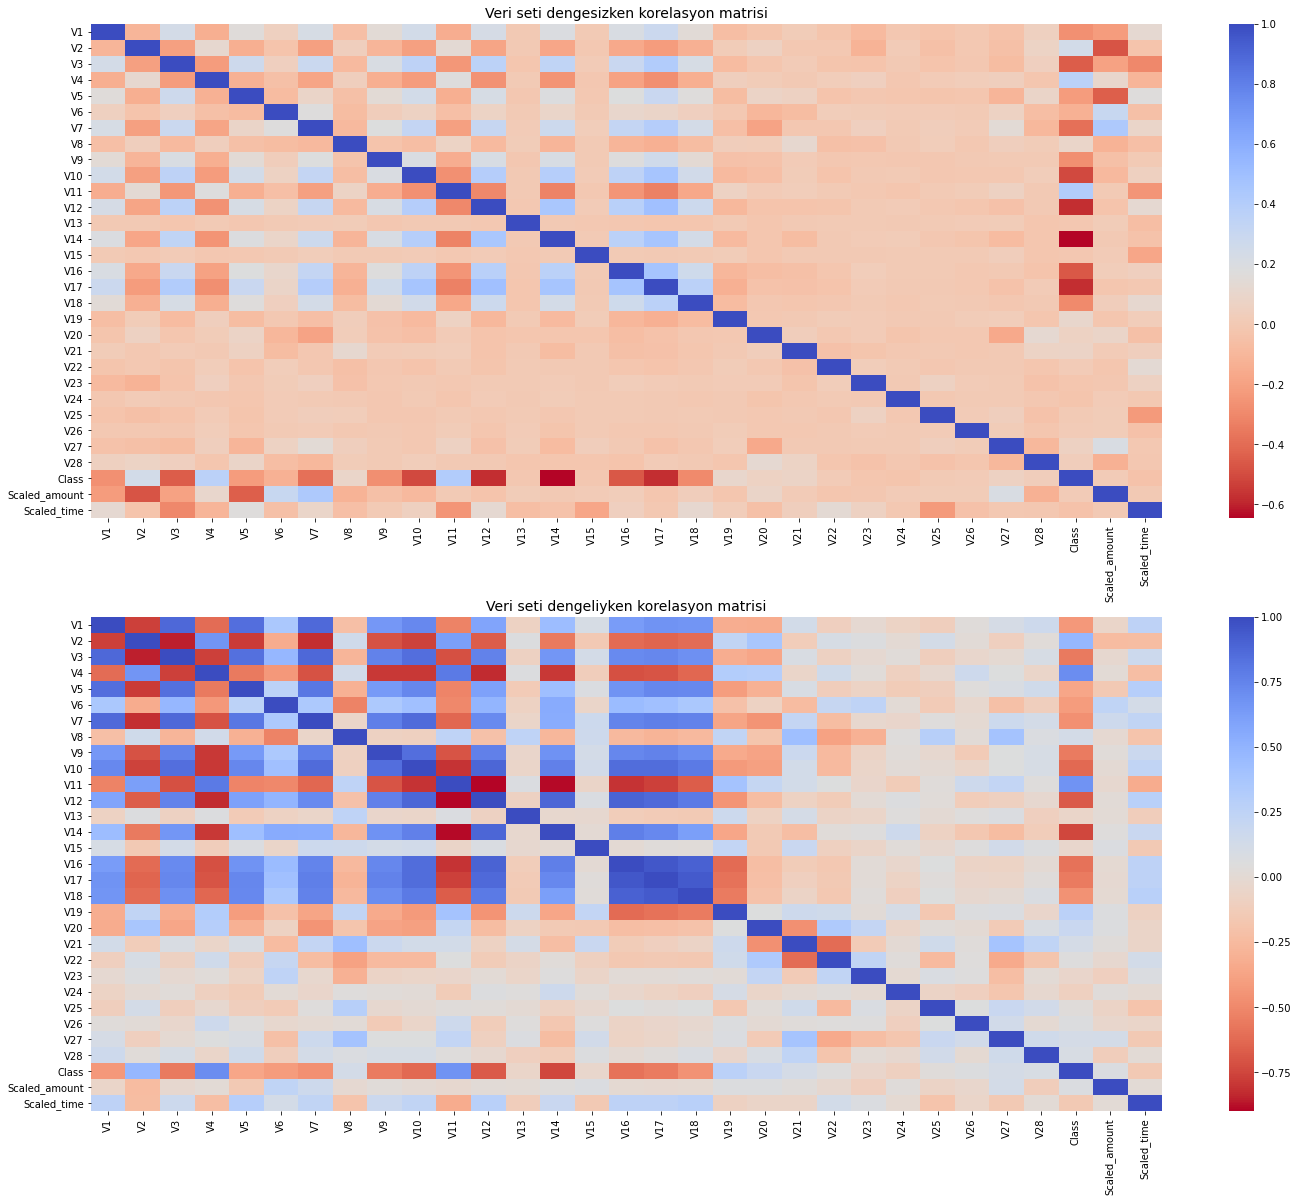

In [18]:
# Korelasyon matrisi
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Veri setinin korelasyon matrisi
corr = raw_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Veri seti dengesizken korelasyon matrisi", fontsize=14)

# Korelasyon matrisi Alt Örneklem
sub_sample_corr = data.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Veri seti dengeliyken korelasyon matrisi', fontsize=14)
plt.show()

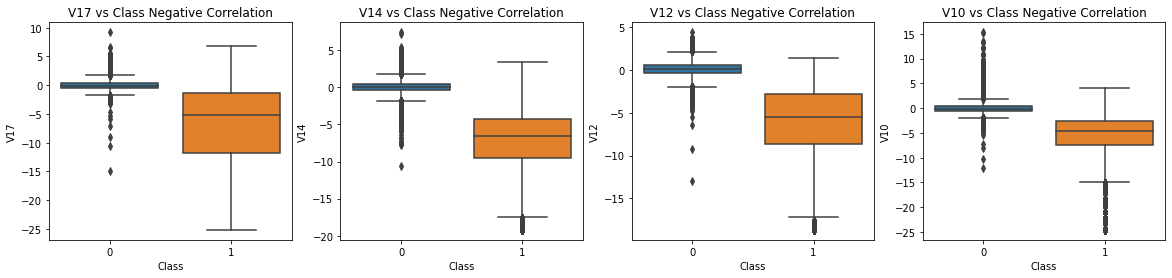

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

neg_corr = ["V17","V14","V12","V10"]
for i,v in enumerate(neg_corr,0):
# Negatif Korelasyon
    sns.boxplot(x="Class", y=v, data=data, ax=axes[i])
    axes[i].set_title(f'{v} vs Class Negative Correlation')

plt.show()

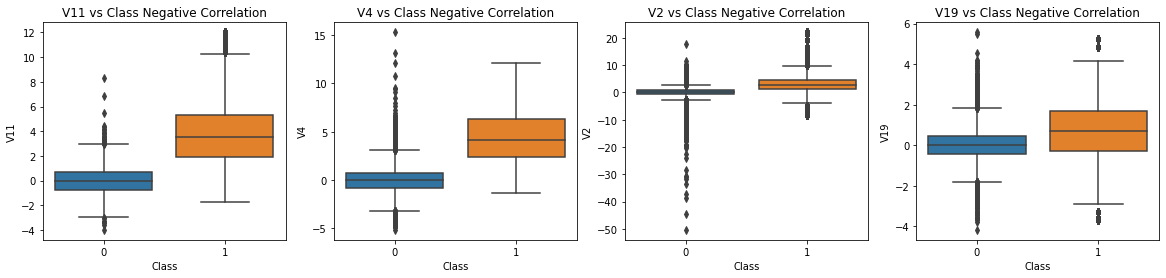

In [20]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

pos_corr = ["V11","V4","V2","V19"]
for i,v in enumerate(pos_corr,0):
# Pozitif Korelasyon
    sns.boxplot(x="Class", y=v, data=data, ax=axes[i])
    axes[i].set_title(f'{v} vs Class Negative Correlation')

plt.show()

In [21]:
# Over sampling
X = data.drop("Class",axis=1)
y = data["Class"]

In [22]:
# Dimensionality Reduction with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2,random_state=0)
X_reduced = pca.fit_transform(X)
X_reduced

array([[-8.97146751,  0.81868513],
       [-9.3058726 ,  1.63656951],
       [-7.71471215,  2.30908263],
       ...,
       [-0.20381139, -3.0755209 ],
       [ 5.26416314, -3.63457168],
       [ 8.11288382, -3.66492293]])

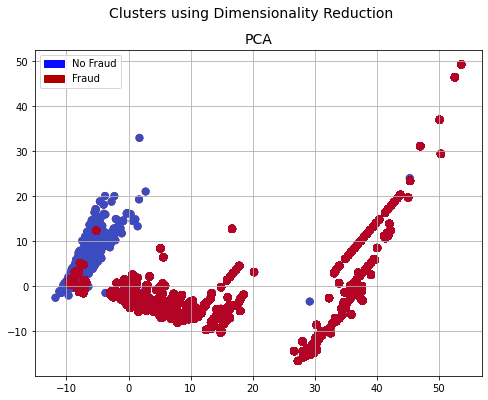

In [23]:
import matplotlib.patches as mpatches
f, ax = plt.subplots(1, 1, figsize=(8,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# PCA scatter plot
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('PCA', fontsize=14)
ax.grid(True)
ax.legend(handles=[blue_patch, red_patch]);

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=10, 
                                       contamination=outlier_fraction, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "One Class Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
}

classifiers_predicted = {
    "Isolation Forest": None,
    "Local Outlier Factor": None,
    "One Class Support Vector Machine": None
}

In [26]:
n_outliers = len(fraud)
print("\nALGORİTMA SONUÇLARI")
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "One Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
   
   
    print("\n")
    print("{}: {}".format(clf_name,n_errors), "\n")
    sayi = accuracy_score(y,y_pred)*100
    sayi = round(sayi,2)
    print("Accuracy Score: ", "%",sayi, "\n")
    print("Classification Report:")
    print(classification_report(y,y_pred))


ALGORİTMA SONUÇLARI


Isolation Forest: 27416 

Accuracy Score:  % 51.6 

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67     28325
           1       1.00      0.03      0.06     28325

    accuracy                           0.52     56650
   macro avg       0.75      0.52      0.37     56650
weighted avg       0.75      0.52      0.37     56650



Local Outlier Factor: 29263 

Accuracy Score:  % 48.34 

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.97      0.65     28325
           1       0.00      0.00      0.00     28325

    accuracy                           0.48     56650
   macro avg       0.25      0.48      0.33     56650
weighted avg       0.25      0.48      0.33     56650



One Class Support Vector Machine: 18262 

Accuracy Score:  % 67.76 

Classification Report:
              precision    recall  f1-score   support

           0     